In [1]:
from sentence_transformers import SentenceTransformer, util

model_path = "ibm-granite/granite-embedding-278m-multilingual"
model = SentenceTransformer(model_path)

input_queries = [
    'Who made the song My achy breaky heart?',
    'summit define'
]

input_passages = [
    "Achy Breaky Heart is a country song written by Don Von Tress. Originally titled Don't Tell My Heart and performed by The Marcy Brothers in 1991.",
    "Definition of summit for English Language Learners. : 1 the highest point of a mountain : the top of a mountain. : 2 the highest level. : 3 a meeting or series of meetings between the leaders of two or more governments."
]
query_embeddings = model.encode(input_queries, convert_to_tensor=True)
passage_embeddings = model.encode(input_passages, convert_to_tensor=True)

cosine_scores = util.cos_sim(query_embeddings, passage_embeddings)

 
print("Cosine Similarity Matrix:")
print(cosine_scores)

Cosine Similarity Matrix:
tensor([[0.8759, 0.3955],
        [0.4511, 0.7783]], device='mps:0')


In [ ]:
tokenizer = model.tokenizer

input_text = ["El gato bebe leche"]
tokenized_input = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")

token_ids = tokenized_input['input_ids'][0]
tokens = tokenizer.convert_ids_to_tokens(token_ids.tolist())

 
print("Subword Tokens for the input:")
for idx, token in enumerate(tokens):
    print(f"Token ID: {token_ids[idx].item()} -> Subword: {token}")
    
print(f"Vocabulary Size: {tokenizer.vocab_size}")

Subword Tokens for the input:
Token ID: 0 -> Subword: <s>
Token ID: 540 -> Subword: ▁El
Token ID: 125583 -> Subword: ▁gato
Token ID: 52224 -> Subword: ▁bebe
Token ID: 95 -> Subword: ▁le
Token ID: 1430 -> Subword: che
Token ID: 2 -> Subword: </s>
Vocabulary Size: 250002


In [16]:
import torch
from sentence_transformers import SentenceTransformer

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

model_path = "ibm-granite/granite-embedding-278m-multilingual"
model = SentenceTransformer(model_path)

transformer_model = model._first_module().auto_model.to(device)
tokenizer = model._first_module().tokenizer

input_text = ["El gato bebe leche"]

tokenized_input = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")
tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

token_ids = tokenized_input['input_ids'][0]
tokens = tokenizer.convert_ids_to_tokens(token_ids.tolist())

with torch.no_grad():
    embeddings = transformer_model.embeddings.word_embeddings(tokenized_input['input_ids'])[0]

print("Subword Tokens and their Embeddings:")
for idx, token in enumerate(tokens):
    print(f"Token ID: {token_ids[idx].item()} {token} -> Embedding: {embeddings[idx].tolist()}")

Using device: mps
Subword Tokens and their Embeddings:
Token ID: 0 <s> -> Embedding: [-0.064453125, -0.01495361328125, -0.061767578125, -0.060791015625, 0.0167236328125, -0.01019287109375, -0.033203125, -0.005584716796875, 0.0400390625, -0.0196533203125, 0.0025787353515625, -0.09228515625, -0.06689453125, 0.05029296875, -0.060791015625, 0.03369140625, 0.054931640625, 0.0177001953125, -0.037353515625, 0.03369140625, -1.2578125, 0.03662109375, -0.0093994140625, 0.0194091796875, 0.0029449462890625, 0.0042724609375, -0.016357421875, -0.0771484375, 0.10693359375, -0.08837890625, -0.007293701171875, -0.011962890625, 0.02783203125, -0.04931640625, -0.046875, -0.06298828125, -0.028564453125, -0.07275390625, -0.01031494140625, -0.010986328125, -0.05126953125, -0.005340576171875, -0.038818359375, -0.01141357421875, -0.0108642578125, 0.0322265625, -0.0213623046875, -0.0216064453125, -0.0196533203125, -0.0712890625, -0.00628662109375, -0.013671875, 0.130859375, 0.0257568359375, -0.0113525390625, -

In [2]:
print(f"A total dimension of {query_embeddings.shape[1]} from each embedding")

A total dimension of 768 from each embedding


/Users/respantaleonp/Workspace/public_repos/granite-workshop-rag-demonstration/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


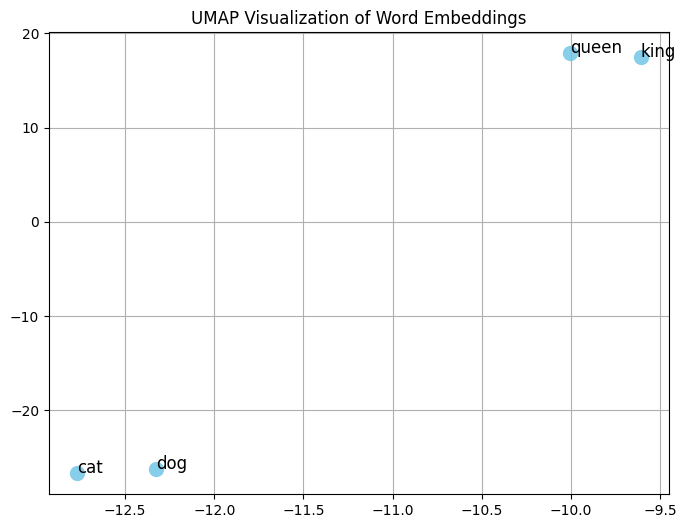

In [3]:
from sentence_transformers import SentenceTransformer
import umap
import matplotlib.pyplot as plt
import numpy as np

model = SentenceTransformer('ibm-granite/granite-embedding-278m-multilingual')

words = ["dog", "cat", "king", "queen"]

embeddings = model.encode(words)

umap_reducer = umap.UMAP(n_neighbors=2, min_dist=0.1, metric='cosine')
umap_embeddings = umap_reducer.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], color='skyblue', s=100)

for i, word in enumerate(words):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], word, fontsize=12)

plt.title("UMAP Visualization of Word Embeddings")
plt.grid(True)
plt.show()


/Users/respantaleonp/Workspace/public_repos/granite-workshop-rag-demonstration/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


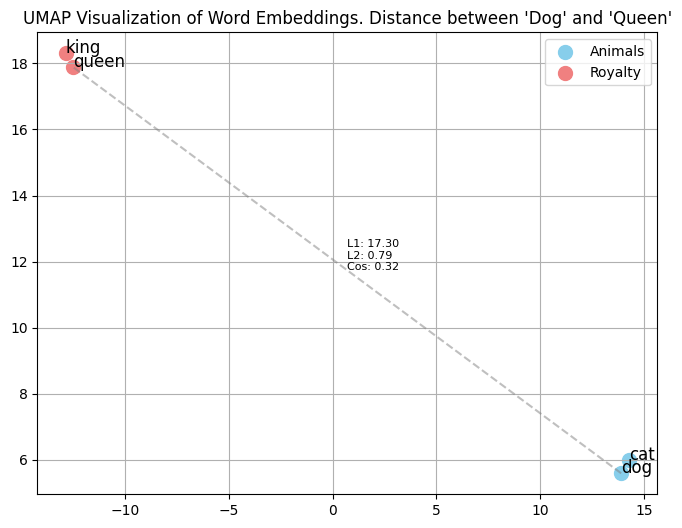

In [4]:
from sentence_transformers import SentenceTransformer
import umap
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine, euclidean, cityblock
model = SentenceTransformer('ibm-granite/granite-embedding-278m-multilingual')

words = ["dog", "cat", "king", "queen"]

embeddings = model.encode(words)

umap_reducer = umap.UMAP(n_neighbors=2, min_dist=0.05, metric='cosine')
umap_embeddings = umap_reducer.fit_transform(embeddings)

plt.figure(figsize=(8, 6))

groups = {
    "Animals": ["dog", "cat"],
    "Royalty": ["king", "queen"]
}
colors = {
    "Animals": "skyblue",
    "Royalty": "lightcoral"
}

for i, word in enumerate(words):
    for group, members in groups.items():
        if word in members:
            plt.scatter(umap_embeddings[i, 0], umap_embeddings[i, 1], color=colors[group], s=100, label=group if i == words.index(members[0]) else "")
            plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], word, fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

pairs = [("dog", "queen")]
for p1, p2 in pairs:
    idx1, idx2 = words.index(p1), words.index(p2)
    vec1, vec2 = embeddings[idx1], embeddings[idx2]
    
    l1_dist = cityblock(vec1, vec2)
    l2_dist = euclidean(vec1, vec2)
    cosine_dist = cosine(vec1, vec2)
    
    plt.plot([umap_embeddings[idx1, 0], umap_embeddings[idx2, 0]], 
             [umap_embeddings[idx1, 1], umap_embeddings[idx2, 1]], 
             linestyle='--', color='gray', alpha=0.5)
    mid_x = (umap_embeddings[idx1, 0] + umap_embeddings[idx2, 0]) / 2
    mid_y = (umap_embeddings[idx1, 1] + umap_embeddings[idx2, 1]) / 2
    
    plt.text(mid_x, mid_y, f"L1: {l1_dist:.2f}\nL2: {l2_dist:.2f}\nCos: {cosine_dist:.2f}", fontsize=8, color='black')

plt.title("UMAP Visualization of Word Embeddings. Distance between 'Dog' and 'Queen'")
plt.grid(True)
plt.show()


/Users/respantaleonp/Workspace/public_repos/granite-workshop-rag-demonstration/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/respantaleonp/Workspace/public_repos/granite-workshop-rag-demonstration/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


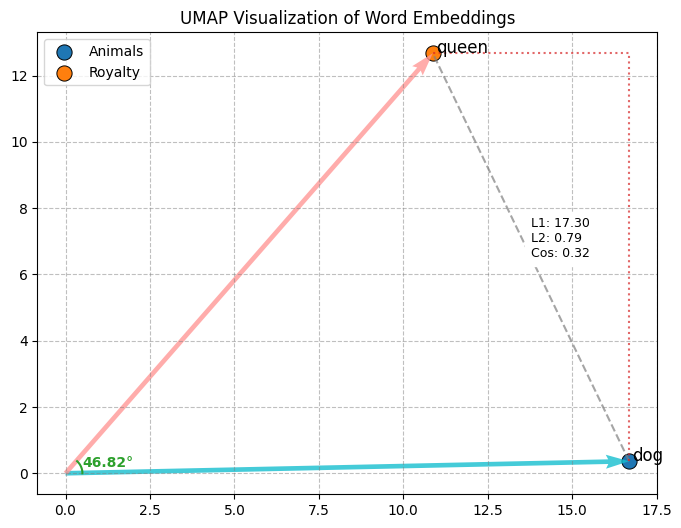

In [5]:
from sentence_transformers import SentenceTransformer
import umap
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine, euclidean, cityblock

 
model = SentenceTransformer('ibm-granite/granite-embedding-278m-multilingual')

 
words = ["dog", "cat", "king", "queen"]

 
embeddings = model.encode(words)

 
umap_reducer = umap.UMAP(n_neighbors=2, min_dist=0.5, metric='cosine', random_state=1)
umap_embeddings = umap_reducer.fit_transform(embeddings)

 
plt.figure(figsize=(8, 6))

 
groups = {
    "Animals": ["dog"],
    "Royalty": ["queen"]
}
colors = {
    "Animals": "#1f77b4",
    "Royalty": "#ff7f0e"
}

 
for i, word in enumerate(words):
    for group, members in groups.items():
        if word in members:
            plt.scatter(umap_embeddings[i, 0], umap_embeddings[i, 1], color=colors[group], s=120, edgecolor='black', linewidth=0.7, label=group if i == words.index(members[0]) else "")
            plt.text(umap_embeddings[i, 0] + 0.1, umap_embeddings[i, 1], word, fontsize=12, color='black')

 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

 
p1, p2 = "dog", "queen"
idx1, idx2 = words.index(p1), words.index(p2)
vec1, vec2 = embeddings[idx1], embeddings[idx2]

 
l1_dist = cityblock(vec1, vec2)
l2_dist = euclidean(vec1, vec2)
cosine_dist = cosine(vec1, vec2)

 
x1, y1 = umap_embeddings[idx1]
x2, y2 = umap_embeddings[idx2]

 
plt.plot([x1, x2], [y1, y2], linestyle='--', color='#7f7f7f', alpha=0.7, label="L2 Distance (Euclidean)")
 
plt.plot([x1, x1, x2], [y1, y2, y2], linestyle=':', color='#d62728', alpha=0.7, label="L1 Distance (Manhattan)")
 
plt.quiver(0, 0, x1, y1, angles='xy', scale_units='xy', scale=1, color='#17becf', label="dog (Vector)", alpha=0.8)
plt.quiver(0, 0, x2, y2, angles='xy', scale_units='xy', scale=1, color='#ff9896', label="queen (Vector)", alpha=0.8)
 
mid_x = (x1 + x2) / 2
mid_y = (y1 + y2) / 2
plt.text(mid_x, mid_y, f"L1: {l1_dist:.2f}\nL2: {l2_dist:.2f}\nCos: {cosine_dist:.2f}", fontsize=9, color='black', backgroundcolor='white')

cosine_angle = np.arccos(1 - cosine_dist)
angle_range = np.linspace(0, cosine_angle, 100)
arc_x = 0.5 * np.cos(angle_range)
arc_y = 0.5 * np.sin(angle_range)
plt.plot(arc_x, arc_y, color='#2ca02c', label="Cosine Angle")
plt.text(0.5, 0.2, f"{np.degrees(cosine_angle):.2f}°", color='#2ca02c', fontsize=10, fontweight='bold')
 
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.title("UMAP Visualization of Word Embeddings")
plt.show()


In [ ]:
from scipy.spatial.distance import cosine

p1, p2 = "dog", "queen"
idx1, idx2 = words.index(p1), words.index(p2)
vec1, vec2 = embeddings[idx1], embeddings[idx2]

cosine_dist = cosine(vec1, vec1) 
cosine_sim = 1 - cosine_dist  

print(f"The cosine distance between '{p1}' and '{p1}' is: {cosine_dist:.2f}")  
print(f"The cosine similarity between '{p1}' and '{p1}' is: {cosine_sim:.2f}")  


The cosine distance between 'dog' and 'dog' is: 0.00
The cosine similarity between 'dog' and 'dog' is: 1.00


In [ ]:
from scipy.spatial.distance import cosine

p1, p2 = "dog", "cat"
idx1, idx2 = words.index(p1), words.index(p2)
vec1, vec2 = embeddings[idx1], embeddings[idx2]

cosine_dist = cosine(vec1, vec2) 
cosine_sim = 1 - cosine_dist  

print(f"The cosine distance between '{p1}' and '{p2}' is: {cosine_dist:.2f}")  
print(f"The cosine similarity between '{p1}' and '{p2}' is: {cosine_sim:.2f}")  

The cosine distance between 'dog' and 'cat' is: 0.14
The cosine similarity between 'dog' and 'cat' is: 0.86


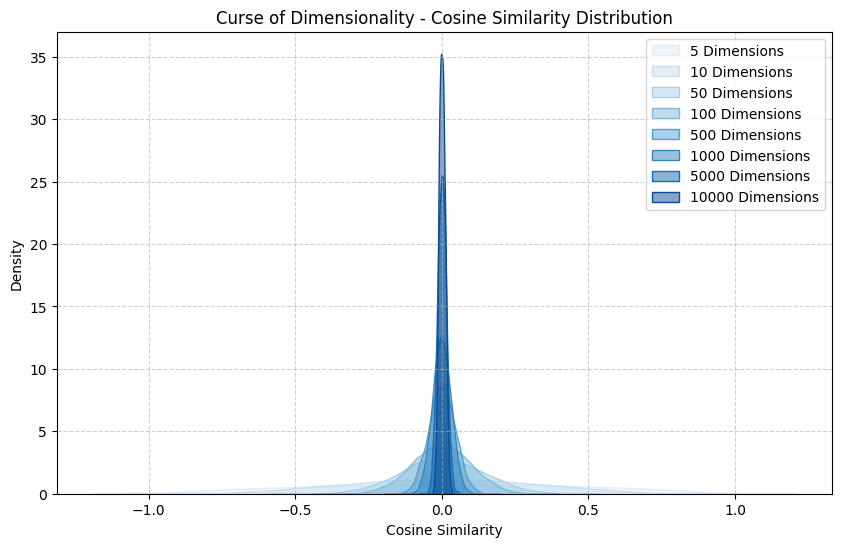

In [ ]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 
dimensions = [5, 10, 50, 100, 500, 1000, 5000, 10000]
adjusted_samples = {
    5: 10000,
    10: 10000,
    50: 10000,
    100: 10000,
    500: 5000,
    1000: 5000,
    5000: 2000,
    10000: 1000
}

 
cosine_distributions = {}

 
for dim in dimensions:
    sample_size = adjusted_samples[dim]
    vecs_a = np.random.randn(sample_size, dim).astype(np.float32)
    vecs_b = np.random.randn(sample_size, dim).astype(np.float32)
    
     
    norms_a = np.linalg.norm(vecs_a, axis=1, keepdims=True) + 1e-8
    norms_b = np.linalg.norm(vecs_b, axis=1, keepdims=True) + 1e-8
    vecs_a = np.nan_to_num(vecs_a / norms_a, nan=0.0, posinf=0.0, neginf=0.0)
    vecs_b = np.nan_to_num(vecs_b / norms_b, nan=0.0, posinf=0.0, neginf=0.0)
    
     
    similarities = np.sum(vecs_a * vecs_b, axis=1).astype(np.float32)
    
     
    similarities = similarities[np.isfinite(similarities)]
    cosine_distributions[dim] = similarities

 
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(dimensions))

for idx, dim in enumerate(dimensions):
    sns.kdeplot(cosine_distributions[dim], label=f"{dim} Dimensions", color=colors[idx], fill=True, alpha=0.5)

plt.title("Curse of Dimensionality - Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
